<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/computevision/flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

import pathlib

import numpy as np 
import pandas as pd

## Read data

In [5]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True) #위의 압축파일 받아서 풀기
data_dir=pathlib.Path(data_dir) #경로 지정

228827136/228813984 [==============================] - 2s 0us/step


In [6]:
image_count=len(list(data_dir.glob('*/*.jpg'))) #하위 jpg파일 모두 읽어서 개수 세기
print(image_count)

3670


## Make train data set

In [8]:
batch_size=32
img_height=180
img_weight=180 #input shape fix

In [11]:
train_df=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    image_size=(img_height,img_height),
    seed=1,
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height,img_height),
    seed=1,
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
class_names=train_df.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Plot images

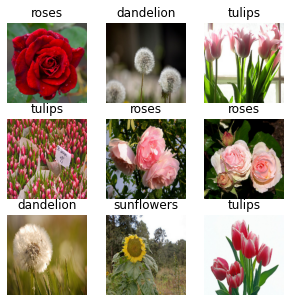

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for images,labels in train_df.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
for image_batch, labels_batch in train_df:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Create Model

In [18]:
num_classes=5
model=Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_weight,3)),

                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Training

In [21]:
epoches=10
history=model.fit(
    train_df,
    validation_data=val_ds,
    epochs=epoches
)

Epoch 1/10
92/92 [==============================] - 139s 1s/step - loss: 1.4029 - accuracy: 0.4026 - val_loss: 1.2156 - val_accuracy: 0.4837
Epoch 2/10
92/92 [==============================] - 138s 1s/step - loss: 1.0853 - accuracy: 0.5586 - val_loss: 1.1418 - val_accuracy: 0.5668
Epoch 3/10
92/92 [==============================] - 137s 1s/step - loss: 0.9116 - accuracy: 0.6485 - val_loss: 0.9894 - val_accuracy: 0.6226
Epoch 4/10
92/92 [==============================] - 114s 1s/step - loss: 0.6978 - accuracy: 0.7391 - val_loss: 0.9836 - val_accuracy: 0.6444
Epoch 5/10
92/92 [==============================] - 89s 969ms/step - loss: 0.5153 - accuracy: 0.8157 - val_loss: 1.0855 - val_accuracy: 0.6199
Epoch 6/10
92/92 [==============================] - 90s 976ms/step - loss: 0.3467 - accuracy: 0.8822 - val_loss: 1.2608 - val_accuracy: 0.6431
Epoch 7/10
92/92 [==============================] - 89s 964ms/step - loss: 0.2088 - accuracy: 0.9332 - val_loss: 1.4742 - val_accuracy: 0.6117
Epoch 8

## Train Results

In [23]:
acc=history.history['accuracy']
val_acc=history,history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epoches)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,labels='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

TypeError: ignored